In [ ]:
#  Proposed:
  # Include: TYPE, BEDS, BATH, PROPERTYSQFT, STATE (OR) SUBLOCALITY
  # Prediction_Label: PRICE
  # Model_Input: Vectorized Features
  # Model_Output: Scalar value of Pred_Price
  # Considerations:
  # (1) Take to feature sampling and omit extranneous features such as "BROKER", "FORMATTED_ADDRESS", etc. Normalize Feature data, and weight the inputs so that larger values do not
  # skew the output too strongly by only a few features.
  # (2) Consider scaling down the features to avoid the Curse of Dimensionality. We are performing KNN on at least 5 features, and so there may be insufficient data to interpolate
  # in between for testing.
  # (3) Split off some test data (training data must still be representative of what will be seen in test)
  # and use that to verify our KNN efficiency.
  # (4) Decide on a metric to validate against. (https://builtin.com/machine-learning/common-loss-functions) Consider, MSE of all test values.
  # (5) Maybe look into ANN(Approximate Nearest Neighbor) if high dimsnesionality makes price prediction difficult for out problem.

# Dataset: https://www.kaggle.com/datasets/nelgiriyewithana/new-york-housing-market/data

# Import Dataset and clean




In [ ]:
from google.colab import drive

drive.mount('/content/drive') # download data-set and move to drive, rename folder to ny_dataset

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math

df = pd.read_csv('/content/drive/MyDrive/ny_dataset/NY-House-Dataset.csv')
df.head()
df_dec = df.copy()

# Khoa - Linear Regression

In [ ]:
# Khoa - Linear Regression

# Dropping non-numerical data
data = df.drop(['BROKERTITLE', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LATITUDE', 'LONGITUDE', 'FORMATTED_ADDRESS', 'ADDRESS', 'MAIN_ADDRESS', 'STREET_NAME', 'LONG_NAME', 'LOCALITY', 'STATE'], axis=1)
print(data)

                    TYPE      PRICE  BEDS       BATH  PROPERTYSQFT  \
0         Condo for sale     315000     2   2.000000   1400.000000   
1         Condo for sale  195000000     7  10.000000  17545.000000   
2         House for sale     260000     4   2.000000   2015.000000   
3         Condo for sale      69000     3   1.000000    445.000000   
4     Townhouse for sale   55000000     7   2.373861  14175.000000   
...                  ...        ...   ...        ...           ...   
4796      Co-op for sale     599000     1   1.000000   2184.207862   
4797      Co-op for sale     245000     1   1.000000   2184.207862   
4798      Co-op for sale    1275000     1   1.000000   2184.207862   
4799      Condo for sale     598125     2   1.000000    655.000000   
4800      Co-op for sale     349000     1   1.000000    750.000000   

          SUBLOCALITY  
0           Manhattan  
1     New York County  
2     Richmond County  
3     New York County  
4     New York County  
...            

In [ ]:
# Dropping rows with null values
data_dropna = data.dropna()
print(data_dropna)

                    TYPE      PRICE  BEDS       BATH  PROPERTYSQFT  \
0         Condo for sale     315000     2   2.000000   1400.000000   
1         Condo for sale  195000000     7  10.000000  17545.000000   
2         House for sale     260000     4   2.000000   2015.000000   
3         Condo for sale      69000     3   1.000000    445.000000   
4     Townhouse for sale   55000000     7   2.373861  14175.000000   
...                  ...        ...   ...        ...           ...   
4796      Co-op for sale     599000     1   1.000000   2184.207862   
4797      Co-op for sale     245000     1   1.000000   2184.207862   
4798      Co-op for sale    1275000     1   1.000000   2184.207862   
4799      Condo for sale     598125     2   1.000000    655.000000   
4800      Co-op for sale     349000     1   1.000000    750.000000   

          SUBLOCALITY  
0           Manhattan  
1     New York County  
2     Richmond County  
3     New York County  
4     New York County  
...            

In [ ]:
# Dropping rows with PRICE above 900K
data_clip = data[(data['PRICE'] < 900000) & (data['PRICE'] > 100000)]
print(data_clip)

                TYPE   PRICE  BEDS  BATH  PROPERTYSQFT      SUBLOCALITY
0     Condo for sale  315000     2   2.0   1400.000000        Manhattan
2     House for sale  260000     4   2.0   2015.000000  Richmond County
5     House for sale  690000     5   2.0   4004.000000     Kings County
6     Condo for sale  899500     2   2.0   2184.207862         New York
8     Co-op for sale  265000     1   1.0    750.000000       East Bronx
...              ...     ...   ...   ...           ...              ...
4791  Co-op for sale  370000     3   1.0   2184.207862         New York
4796  Co-op for sale  599000     1   1.0   2184.207862         New York
4797  Co-op for sale  245000     1   1.0   2184.207862    Queens County
4799  Condo for sale  598125     2   1.0    655.000000           Queens
4800  Co-op for sale  349000     1   1.0    750.000000         Brooklyn

[2642 rows x 6 columns]


170


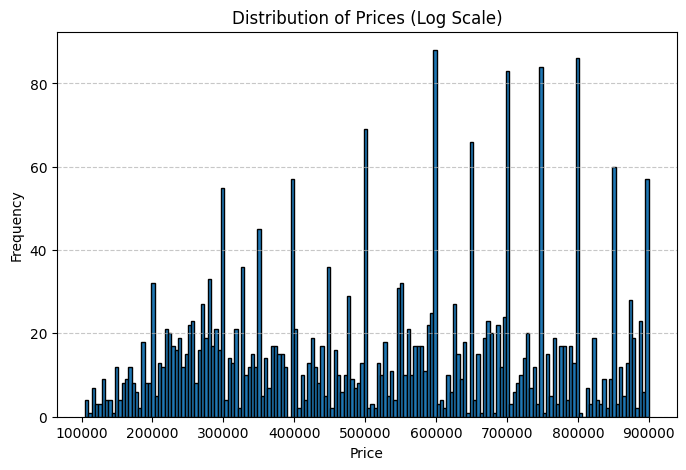

In [ ]:
# Plot the distribution of the PRICE column

# Histogram
plt.figure(figsize=(8, 5))

bin_size = math.ceil(math.sqrt(data.size))
print(bin_size)

data_clip['PRICE'].plot.hist(bins=bin_size, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices (Log Scale)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

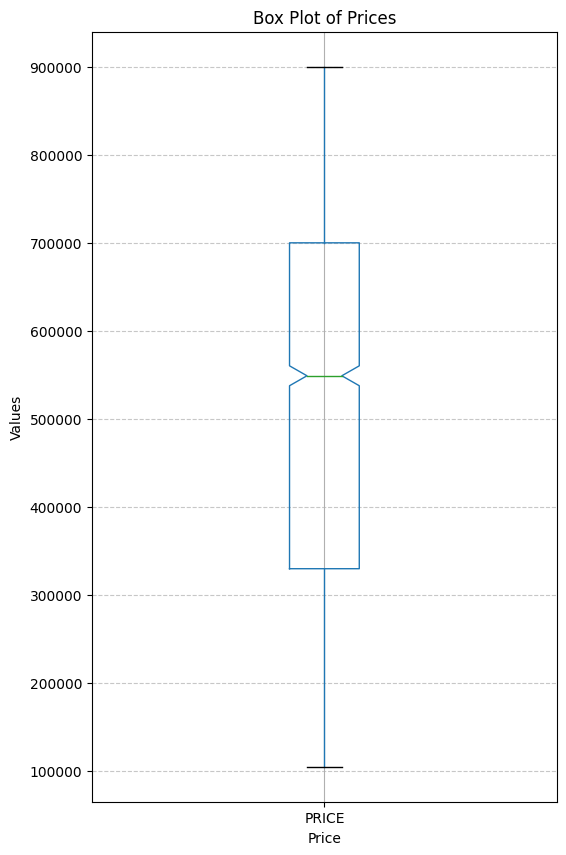

In [ ]:
# Box Plot
plt.figure(figsize=(6, 10))
data_clip.boxplot(column='PRICE', notch=True)
plt.xlabel('Price')
plt.ylabel('Values')
plt.title('Box Plot of Prices')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

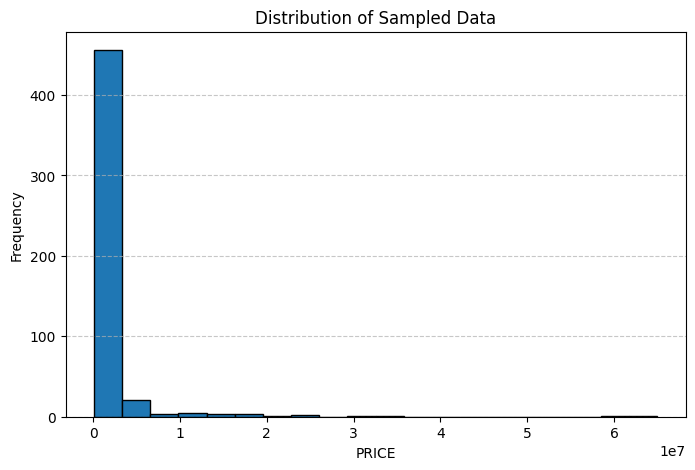

In [ ]:
# Random sampling price distribution

# Sample a smaller portion of the data
sample_size = 500
data_sample = data['PRICE'].sample(sample_size, random_state=42)

# Plot the histogram of the sample
plt.figure(figsize=(8, 5))
data_sample.plot.hist(bins=20, edgecolor='black')
plt.xlabel('PRICE')
plt.ylabel('Frequency')
plt.title('Distribution of Sampled Data')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


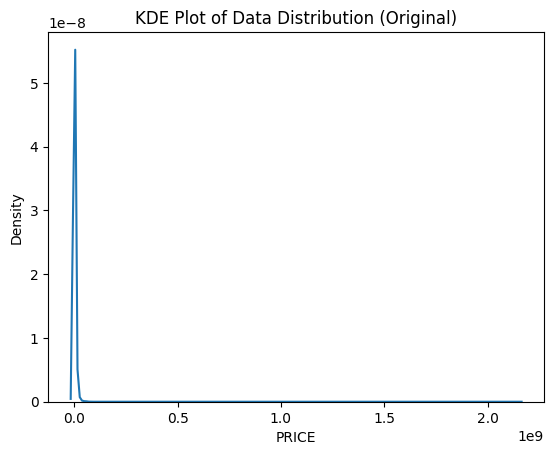

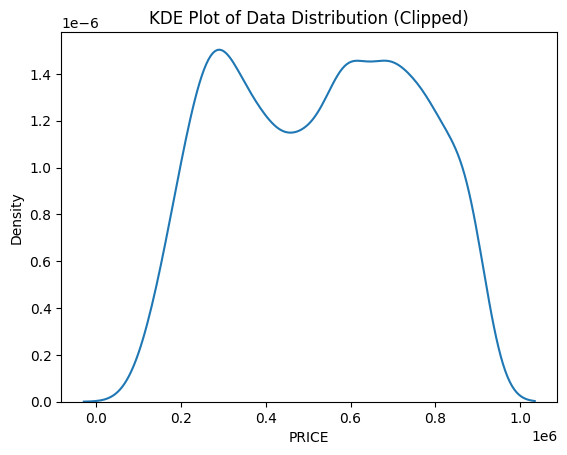

In [ ]:
import seaborn as sns
# Plot the KDE of the origianl data
sns.kdeplot(data['PRICE'])
plt.xlabel('PRICE')
plt.ylabel('Density')
plt.title('KDE Plot of Data Distribution (Original)')
plt.show()

# Plot the KDE of the entire clipped data
sns.kdeplot(data_clip['PRICE'])
plt.xlabel('PRICE')
plt.ylabel('Density')
plt.title('KDE Plot of Data Distribution (Clipped)')
plt.show()

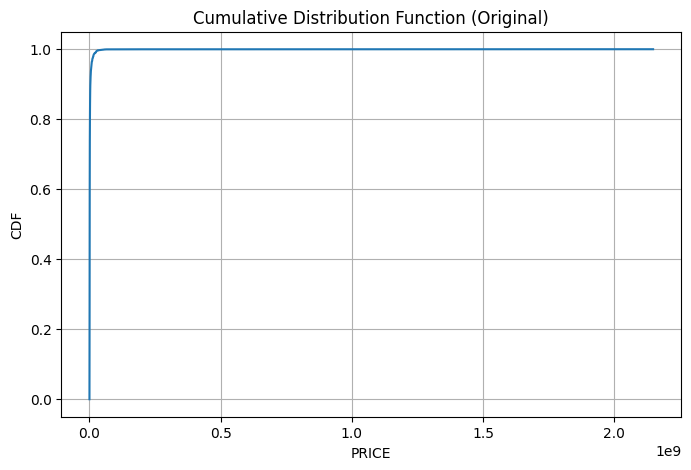

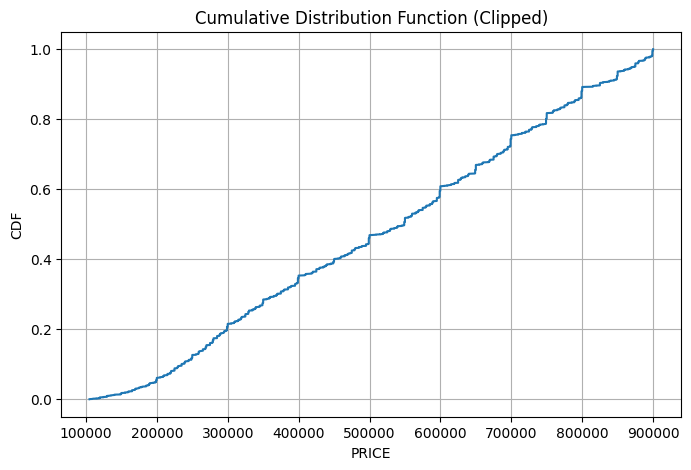

In [ ]:
import numpy as np

# Calculate the CDF of the original data
data_sorted = data['PRICE'].sort_values()
cdf = np.linspace(0, 1, len(data_sorted))

# Plot the CDF of the original data
plt.figure(figsize=(8, 5))
plt.plot(data_sorted, cdf)
plt.xlabel('PRICE')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function (Original)')
plt.grid(True)
plt.show()

# Calculate the CDF of the clipped data
data_sorted_clip = data_clip['PRICE'].sort_values()
cdf_clip = np.linspace(0, 1, len(data_sorted_clip))

# Plot the CDF of the clipped data
plt.figure(figsize=(8, 5))
plt.plot(data_sorted_clip, cdf_clip)
plt.xlabel('PRICE')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function (Clipped)')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error

# Define the pipeline with StandardScaler and LinearRegression
pipe = Pipeline([
    ('scaler', StandardScaler()),
     ('model', LinearRegression())])

# Define the number of folds
kfold = KFold(n_splits=18, shuffle=True, random_state=199)  # Adjust k as needed

# Empty list to store results
mae_scores = []

features = data_clip[['BATH', 'BEDS', 'PROPERTYSQFT']]
target = data_clip['PRICE']

# Iterate through each fold
for train_index, test_index in kfold.split(features, target):
  X_train, X_test = features.iloc[train_index], features.iloc[test_index]
  y_train, y_test = target.iloc[train_index], target.iloc[test_index]

  # Fit the pipeline on the training data
  pipe.fit(X_train, y_train)

  # Evaluate the model using Mean Absolute Error
  y_pred = pipe.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred)  # Replace with your metric (e.g., accuracy)
  mae_scores.append(mae)

# Print the average R-squared across folds
print(f"Average Mean Absolute Error: {np.mean(mae_scores)}")


Average Mean Absolute Error: 151674.2504009081


In [ ]:
# Create a ColumnTransformer object
transformer = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), ['TYPE', 'SUBLOCALITY']))

# Define a function to convert a sparse matrix to a dense matrix
def to_dense(X):
    return X.toarray()

# Create a FunctionTransformer object
to_dense_transformer = FunctionTransformer(to_dense)

# Define the pipeline with StandardScaler and LinearRegression
pipe = Pipeline([
    ('transformer', transformer),
    ('scaler', StandardScaler(with_mean=False)),
     ('model', LinearRegression())])

# Define the number of folds
kfold = KFold(n_splits=2, shuffle=True, random_state=199)  # Adjust k as needed

# Empty list to store results
mae_scores = []

features = data_clip[['BATH', 'BEDS', 'PROPERTYSQFT', 'TYPE', 'SUBLOCALITY']]
target = data_clip['PRICE']

# Iterate through each fold
for train_index, test_index in kfold.split(features, target):
  X_train, X_test = features.iloc[train_index], features.iloc[test_index]
  y_train, y_test = target.iloc[train_index], target.iloc[test_index]

  # Fit the pipeline on the training data
  pipe.fit(X_train, y_train)

  # Evaluate the model using Mean Absolute Error
  y_pred = pipe.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred)  # Replace with your metric (e.g., accuracy)
  mae_scores.append(mae)

# Print the average R-squared across folds
print(f"Average Mean Absolute Error: {np.mean(mae_scores)}")

Average Mean Absolute Error: 132784.64649125322


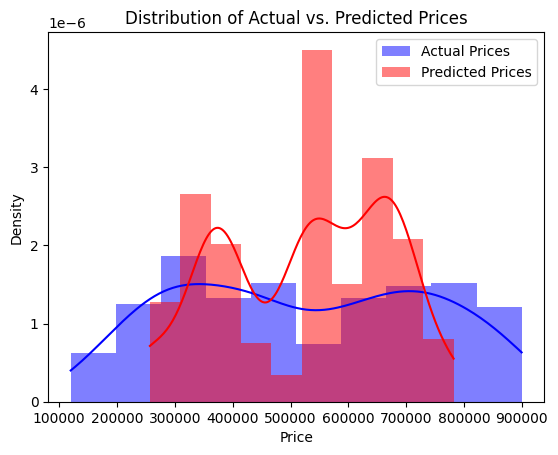

In [ ]:
sns.histplot(y_test, color="blue", label='Actual Prices', kde=True, stat="density", linewidth=0)
sns.histplot(y_pred, color="red", label='Predicted Prices', kde=True, stat="density", linewidth=0)

plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Distribution of Actual vs. Predicted Prices')
plt.legend()
plt.show()

# Jerry - K-Means Clustering

In [ ]:
# JERRY ONLY
import pandas as pd
import gdown
url = f'https://drive.google.com/uc?id=1bcb_tkcPLLdcV8_YQmKAPEezJOK_cHkN'

output = 'NYDataset.csv'

gdown.download(url, output, quiet=False)

kMeansdf = pd.read_csv(output, header=0, skipinitialspace=True)

kMeansdf = kMeansdf.drop(['BROKERTITLE', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LATITUDE', 'LONGITUDE', 'FORMATTED_ADDRESS', 'ADDRESS', 'MAIN_ADDRESS', 'STREET_NAME', 'LONG_NAME',
                          'LOCALITY', 'STATE'], axis=1)

Downloading...
From: https://drive.google.com/uc?id=1bcb_tkcPLLdcV8_YQmKAPEezJOK_cHkN
To: /content/NYDataset.csv
100%|██████████| 1.33M/1.33M [00:00<00:00, 36.9MB/s]


In [ ]:
# JERRY ONLY
print("#################################################### Original unique dataframe values after dropping extranneous columns: \n")
for col in kMeansdf:
  print(kMeansdf[col].unique())

# Filter out outlier data, for houses only worth over 100k and 1mil (CHANGE this IF you want to include larger spread of data for different prediction tasks.)
kMeansdf = kMeansdf[(kMeansdf['PRICE'] < 1000000)& (kMeansdf['PRICE'] > 100000)] # clip anything over x mil and under x hundred k
kMeansdf = kMeansdf[(kMeansdf['BATH'] < 7) & (kMeansdf['BATH'] > 0)]
kMeansdf = kMeansdf[(kMeansdf['BEDS'] < 8) & (kMeansdf['BEDS'] > 0)]

# Replace Home Type strings with numerical labels
kMeansdf['TYPE'].replace({'House for sale': 1, 'Townhouse for sale': 2, 'Multi-family home for sale': 3, 'Condo for sale': 4, 'Co-op for sale': 5, 'Condop for sale': 6,
                          'For sale': 7, 'Pending': 8, 'Coming Soon': 9, 'Contingent': 10, 'Foreclosure': 14, 'Land for sale': 15, 'Mobile house for sale': 16}, inplace=True)
# Replace Sublocality strings with numerical labels
kMeansdf['SUBLOCALITY'].replace({'New York': 4,
                                 'Manhattan': 1, 'New York County': 1,
                                 'Kings County': 4, 'Brooklyn': 4, 'Brooklyn Heights': 5, 'Dumbo': 2, 'Snyder Avenue': 3, 'Fort Hamilton': 6, 'Coney Island': 7,
                                 'Queens': 8, 'Queens County': 9, 'Flushing': 10, 'Jackson Heights': 11, 'Rego Park': 12,
                                 'Richmond County': 13, 'Staten Island': 14,
                                 'Riverdale': 22,'East Bronx': 21, 'The Bronx': 20, 'Bronx County': 20}, inplace=True)


print("\n \n #################################################### Modified dataframe unique values after numerical label replacement done. Dataframe now ready for processing \n")
for col in kMeansdf:
  print(kMeansdf[col].unique())
print("\n")

# Print dataframe
print("\n \n #################################################### DF \n")
print(kMeansdf)

#################################################### Original unique dataframe values after dropping extranneous columns: 

['Condo for sale' 'House for sale' 'Townhouse for sale' 'Co-op for sale'
 'Multi-family home for sale' 'For sale' 'Contingent' 'Land for sale'
 'Foreclosure' 'Pending' 'Coming Soon' 'Mobile house for sale'
 'Condop for sale']
[   315000 195000000    260000 ...   1058000    825900    598125]
[ 2  7  4  3  5  8  1  6 12 10 11  9 15 14 16 20 35 24 50 13 32 36 42 40
 30 19 18]
[ 2.         10.          1.          2.37386086 16.          3.
  4.          6.          8.          5.          9.          7.
 32.         13.         50.         20.         11.         12.
 24.         43.          0.         17.        ]
[ 1400. 17545.  2015. ...  7854.   903.   655.]
['Manhattan' 'New York County' 'Richmond County' 'Kings County' 'New York'
 'East Bronx' 'Brooklyn' 'The Bronx' 'Queens' 'Staten Island'
 'Queens County' 'Bronx County' 'Coney Island' 'Brooklyn Heights'
 'Ja

In [ ]:
# JERRY ONLY
# Shuffle dataset for even distribution of data
kMeansdf = kMeansdf.sample(frac=1).reset_index(drop=True)
print(kMeansdf)
# Remove labels from dataset and set aside
kMeansdfLabels = kMeansdf['PRICE']
kMeansdf = kMeansdf.drop(['PRICE'], axis=1)
print(kMeansdf)
print(kMeansdfLabels)

      TYPE   PRICE  BEDS      BATH  PROPERTYSQFT  SUBLOCALITY
0        4  580000     1  2.373861   2184.207862            9
1        4  875000     3  1.000000    294.000000            4
2       10  479999     3  2.000000   1510.000000           13
3        5  568888     3  2.000000   1100.000000            9
4        1  874900     3  4.000000   1500.000000           13
...    ...     ...   ...       ...           ...          ...
2900     5  300000     3  1.000000   2184.207862            8
2901     5  199000     1  1.000000   2184.207862            8
2902     1  339000     2  1.000000    700.000000           13
2903    10  699000     3  2.000000   1312.000000           13
2904     1  569000     3  1.000000   2184.207862            9

[2905 rows x 6 columns]
      TYPE  BEDS      BATH  PROPERTYSQFT  SUBLOCALITY
0        4     1  2.373861   2184.207862            9
1        4     3  1.000000    294.000000            4
2       10     3  2.000000   1510.000000           13
3        5     

In [ ]:
# JERRY ONLY
from statistics import stdev, mean
# print(kMeansdf.iloc[0][0])
# print(kMeansdfLabels.iloc[0])

# Move CSV data into lists
num_rows = kMeansdf.shape[0]
num_cols = kMeansdf.shape[1]
kMeansData = []
kMeansLabels = []

for i in range(num_rows):
  temp = []
  for j in range(num_cols):
    temp.append(kMeansdf.iloc[i][j])
  kMeansData.append(temp)
  kMeansLabels.append(kMeansdfLabels.iloc[i])
print(kMeansData[0])

# Normalize the data across mean, standard deviation
# I do this by subtracting the mean (µ) of each feature and a division by the standard deviation (σ).
mean_data_arr = []
stdev_data_arr = []

for j in range(num_cols):
  temp = []
  for i in range(num_rows):
    temp.append(kMeansData[i][j])
  mean_data_arr.append(mean(temp))
  stdev_data_arr.append(stdev(temp))
print(mean_data_arr)
print(stdev_data_arr)

for j in range(num_cols):
  for i in range(num_rows):
    kMeansData[i][j] -= mean_data_arr[j]
    kMeansData[i][j] /= stdev_data_arr[j]

print(kMeansData[0])

[4.0, 1.0, 2.3738608579684373, 2184.207862, 9.0]
[4.128743545611015, 2.513597246127367, 1.6574818883064089, 1583.752838766265, 8.813080895008605]
[2.454534926600702, 1.266178077724583, 0.7765904436468359, 663.6707101482616, 5.406655388978986]
[-0.05245129910997546, -1.195406296124961, 0.9224668878204875, 0.9047484152187395, 0.03457203974427771]


In [ ]:
# JERRY ONLY
# K-Means Attempt: JERRY
from math import dist, fsum
from statistics import mean
from random import randint


def k_means_clustering(data_list, data_labels, k, starting_centers):
    centroids = starting_centers
    dimensions = len(data_list[0])
    while True:
        # Check if any clusters came back empty (no datapoints assigned). If so, remove cluster centroid.
        del_i = 0
        while del_i < len(centroids):
          if del_i < len(centroids) and not any(centroids[del_i]):
            centroids.pop(del_i)
            del_i -= 1
          del_i += 1

        # ASSIGN EACH DATAPOINT TO A CENTROID
        k = len(centroids)
        cen_assign = []
        datapt_price_labels = []
        for i in range(k):
          cen_assign.append([])
          datapt_price_labels.append([])
        # assign data points to centroids for 1 iteration
        for i in range(len(data_list)):
            # Find distances between centroids and datapoint
            temp_len_arr = []
            for j in range(k):
              dist_j_datapoint = dist(centroids[j], data_list[i])
              temp_len_arr.append(dist_j_datapoint)
            # Find the shortest distance between datapoint and a centroid, then assign to a centroid
            shortestDist = temp_len_arr[0]
            shortestDistIndex = 0
            for j in range(k):
              if temp_len_arr[j] < shortestDist:
                shortestDist = temp_len_arr[j]
                shortestDistIndex = j
            cen_assign[shortestDistIndex].append(data_list[i])
            datapt_price_labels[shortestDistIndex].append(data_labels[i])

        # RECALCULATE CENTROIDS AS A MEAN OF THEIR ASSIGNED DATAPOINTS
        cenList, mean_price_by_cen = calculate_centroids(cen_assign, datapt_price_labels, k, dimensions)
        # determine if at the end of k-Means algorithm
        same_cen_done = True
        for i in range(len(cenList)):
          if cenList[i] != centroids[i]:
              same_cen_done = False
              centroids = cenList
              break

        if same_cen_done:
          return centroids, cen_assign, mean_price_by_cen

# Calculate new centroids, given the datapoint assignments, num of clusters k, dimension size of datapoints dim.
# data_assign is a multi-D Vector, as 0th index belongs to centroid1, 1st index belongs to centroid 2, and so on...
# within each data_assign[i] is a list of multi-D datapoints assigned to each cluster. Thus, data_assign is a 3D list [cluster[datapoint[individual_dimension[]]]]
def calculate_centroids(data_assign, datapt_price_labels, k, dim):
    cen_new = []
    for i in range(k):
      temp = []
      for j in range(dim):
        temp.append([])
      cen_new.append(temp)

    # The structure of cen_new is as follows:
    # [[[], [], [], [], []], [...], [...],...[...]]
    # [cluster[datapoint[individual_dimensions as a list for mean calculation[]]]]
    # For each Centroid, and each datapoint assigned to a centroid, and each dimension of the datapoint:
    # append the value at the dimension into a list for the centroid calculation
    for i in range(k):
      for d in range(len(data_assign[i])):
        for j in range(dim):
          cen_new[i][j].append(data_assign[i][d][j])
    # Calculate new centroids by taking the mean at each dimension for each centroid
    cen_new_calc = []
    new_mean_price_by_cen = []
    for i in range(k):
      temp = []
      for j in range(dim):
        if len(cen_new[i][j]) != 0:
          temp.append(mean(cen_new[i][j]))
        else:
          temp.append([])
      # append new centroids to cen_new_calc. append new mean price value of cluster to new_mean_price_by_cen.
      cen_new_calc.append(temp)
      if len(datapt_price_labels[i]) != 0:
        new_mean_price_by_cen.append(round(mean(map(float, datapt_price_labels[i])), 2))
      else:
        new_mean_price_by_cen.append(None)

    return cen_new_calc, new_mean_price_by_cen


def run_k_means(k, starting_centers, data_coord, data_labels):
  centers, assignments, new_mean_vals = k_means_clustering(data_coord, data_labels, k, starting_centers)
  print(f"There are {len(centers)} clusters.")
  print(f"Final Clusters centered at: {centers} with mean values of: {new_mean_vals}")
  # print(f"Final Centroids and Datapoint Assignments at: ")
  # for i in range(len(centers)):
  #   print(f"Cluster Center: {centers[i]} has mean price value of: {new_mean_vals[i]}, with datapoints: {assignments[i]}")

  return centers, new_mean_vals

# Randomly select k samples from the dataset to be set as the starting centroid seeds.
def calculate_cluster_seeds(k, datapts):
  rand_cens = []
  for i in range(k):
    rand_seed = randint(0, len(datapts)-1)
    rand_cens.append(datapts[rand_seed])
  return rand_cens


def run_k_means_to_Predict(housingData, housingPrices, ratio=0.1, k=5):
  # Split dataset into main training data, and a test set
  numIterations = round(1/ratio)
  numDatapts = len(housingData)
  numTestpts = round(numDatapts * ratio)

  # housing_DataSet = housingData[numTestpts:]
  # housing_DataSet_Labels = housingPrices[numTestpts:]

  # housing_TestSet = housingData[:numTestpts]
  # housing_TestSet_Labels = housingPrices[:numTestpts]

  # k-Fold Cross Validation
  MAE_arr_iterated_results = []
  kFold_iterations = 0
  while kFold_iterations < numIterations:
    testBeg = kFold_iterations * numTestpts
    testEnd = (kFold_iterations + 1) * numTestpts
    if testEnd >= numDatapts:
      testEnd = numDatapts - 1

    housing_TestSet = housingData[testBeg:testEnd]
    housing_TestSet_Labels = housingPrices[testBeg:testEnd]

    housing_DataSet = housingData[:testBeg] + housingData[testEnd:]
    housing_DataSet_Labels = housingPrices[:testBeg] + housingPrices[testEnd:]

    # Run K-Means
    print(f"Size of training data: {len(housing_DataSet)}, Size of testing data: {len(housing_TestSet)}")
    starting_centers = calculate_cluster_seeds(k, housing_DataSet)
    centroids, mean_prices = run_k_means(k, starting_centers, housing_DataSet, housing_DataSet_Labels)

    # Perform Predictions with K-Means model and housing_TestSet
    predicted_prices = []
    for i in range(len(housing_TestSet)):
      temp = []
      for j in range(len(centroids)):
        temp.append(dist(centroids[j], housing_TestSet[i]))
      smallestDist = temp[0]
      smallestDistIndex = 0
      for j in range(len(temp)):
        if smallestDist > temp[j]:
          smallestDist = temp[j]
          smallestDistIndex = j
      predicted_prices.append(mean_prices[smallestDistIndex])

    # Print Predictions
    testPrice_list = list(set(predicted_prices))
    print(f"The Number of Unique Prices is: {len(testPrice_list)}")
    print(f"The predicted housing prices for a unit with the following features are: ")
    print("TYPE   BEDS   BATH   PROPERTYSQFT   SUBLOCALITY  |  PRICE")
    # Print first few entires for every iteration only
    for i in range(round(len(housing_TestSet) * ratio)):
      message = ""
      for j in range(len(housing_TestSet[i])):
        message = message + f"  {round(housing_TestSet[i][j], 2)}   "
      message = message + f"    |   {predicted_prices[i]}"
      print(message)

    # Compare Prediction Prices with housing_TestSet_Labels, MAE (Mean Absolute Error)
    MAE = 0
    for i in range(len(predicted_prices)):
      MAE += (abs(predicted_prices[i] - housing_TestSet_Labels[i]))
    MAE /= len(housing_TestSet_Labels)

    MAE_arr_iterated_results.append(MAE)
    print(f"K-Fold Iteration: {kFold_iterations}. The MAE (Mean Absolute Error) of running K-Means on this Housing Dataset is: {MAE}. \n Parameters used this round are: k: {k},\
    final number of unique prices: {len(testPrice_list)}, ratio of test data split from training data: {ratio}")

    kFold_iterations += 1

  print(f"The Average MAE (Mean Absolute Error) of running K-Means on this Housing Dataset with k-Fold Cross Validation with k-Fold={numIterations} is: {mean(MAE_arr_iterated_results)}. \
  \n The MAE for each K-Fold iteration was: {MAE_arr_iterated_results}, and the ratio of test data split from training data: {ratio}")

  return


# TODO:
# Test clustering by hand:DONE
# Find a way to randomize centroids/calculate approximate centroid location (shuffle samples and take centroid seed): DONE, RAND centers from dataset
# Reorder the housing TYPE numerical values and SUBLOCALITY to be closer together in price. (This will induce smoother logical interpolation when taking mean): DONE
# Normalize data: DONE
# Implement K-Fold Cross Validation to make up for small dataset: DONE

# static example
# k = 4
# starting_centers = [[1, 1, 3, 4], [2, 3, 3, 3], [3, 2, 3, 2], [2, 3, 3, 7]]
# data_coord = [[1, 1, 3, 4], [2, 1, 3, 5], [0, 1, 3, 2], [4, 1, 3, 1], [4, 2, 3, 3], [3, 1, 3, 6]]
# data_labels = [3, 1, 2, 1, 1, 1]
# run_k_means(k, starting_centers, data_coord, data_labels)
# Use Housing Data
# k = 4
# starting_centers = calculate_cluster_seeds(k, kMeansData)
# run_k_means(k, starting_centers, kMeansData, kMeansLabels)

# Use Housing Data and Predict with split off Test Set
run_k_means_to_Predict(kMeansData, kMeansLabels, 0.08, 150)

Size of training data: 2673, Size of testing data: 232
There are 113 clusters.
Final Clusters centered at: [[-1.2746787636646213, 0.4368022399607543, -0.8466262927713888, -0.49123684448888844, 0.4784693898310243], [0.3398686277841084, -0.9906489528884017, -0.8466262927713888, 0.9047484152187395, 2.082802096471704], [0.32922675122463324, -1.195406296124961, -0.8466262927713888, 0.9047484152187395, -0.15038518945853338], [0.2808834639503825, -1.195406296124961, -0.8466262927713888, 0.9047484152187395, 0.05138633330816963], [0.3549578557415732, 0.49697582654455946, -0.8466262927713888, -0.9323190391030485, -0.8902141062697777], [0.08335175250720742, -0.8663319944947765, 0.4410537297950005, -0.9556739947504619, 0.3890733957163323], [-0.3031646251724669, 0.3233981729374291, 1.0594536558271912, 0.9948746994773303, -0.9755789812864597], [4.393622521226489, 0.4184885396961179, 0.8806048740791408, 0.8042124663084884, -0.11017709615357442], [0.6265639589759389, 0.38415035169992473, -0.8466262927

In [ ]:
data_table.enable_dataframe_formatter()
df_dec

BROKERTITLE                TYPE  \
0           Brokered by Douglas Elliman  -111 Fifth Ave      Condo for sale   
1                                   Brokered by Serhant      Condo for sale   
2                                Brokered by Sowae Corp      House for sale   
3                                   Brokered by COMPASS      Condo for sale   
4     Brokered by Sotheby's International Realty - E...  Townhouse for sale   
...                                                 ...                 ...   
4796                                Brokered by COMPASS      Co-op for sale   
4797                    Brokered by Mjr Real Estate Llc      Co-op for sale   
4798      Brokered by Douglas Elliman - 575 Madison Ave      Co-op for sale   
4799            Brokered by E Realty International Corp      Condo for sale   
4800                 Brokered by Nyc Realty Brokers Llc      Co-op for sale   

          PRICE  BEDS       BATH  PROPERTYSQFT  \
0        315000     2   2.000000   1400.000000   
1     195000000     7  10.000000  17545.000000   
2        260000     4   2.000000   2015.000000   
3         69000     3   1.000000    445.000000   
4      55000000     7   2.373861  14175.000000   
...         ...   ...        ...           ...   
4796     599000     1   1.000000   2184.207862   
4797     245000     1   1.000000   2184.207862   
4798    1275000     1   1.000000   2184.207862   
4799     598125     2   1.000000    655.000000   
4800     349000     1   1.000000    750.000000   

                                                ADDRESS  \
0                                  2 E 55th St Unit 803   
1     Central Park Tower Penthouse-217 W 57th New Yo...   
2                                      620 Sinclair Ave   
3                               2 E 55th St Unit 908W33   
4                                           5 E 64th St   
...                                                 ...   
4796                               222 E 80th St Apt 3A   
4797                                97-40 62 Dr Unit Lg   
4798                          427 W 21st St Unit Garden   
4799                           91-23 Corona Ave Unit 4G   
4800                            460 Neptune Ave Apt 14O   

                        STATE  \
0          New York, NY 10022   
1          New York, NY 10019   
2     Staten Island, NY 10312   
3         Manhattan, NY 10022   
4          New York, NY 10065   
...                       ...   
4796      Manhattan, NY 10075   
4797      Rego Park, NY 11374   
4798       New York, NY 10011   
4799       Elmhurst, NY 11373   
4800       Brooklyn, NY 11224   

                                           MAIN_ADDRESS  \
0                2 E 55th St Unit 803New York, NY 10022   
1     Central Park Tower Penthouse-217 W 57th New Yo...   
2               620 Sinclair AveStaten Island, NY 10312   
3            2 E 55th St Unit 908W33Manhattan, NY 10022   
4                         5 E 64th StNew York, NY 10065   
...                                                 ...   
4796            222 E 80th St Apt 3AManhattan, NY 10075   
4797             97-40 62 Dr Unit LgRego Park, NY 11374   
4798        427 W 21st St Unit GardenNew York, NY 10011   
4799         91-23 Corona Ave Unit 4GElmhurst, NY 11373   
4800          460 Neptune Ave Apt 14OBrooklyn, NY 11224   

     ADMINISTRATIVE_AREA_LEVEL_2         LOCALITY      SUBLOCALITY  \
0                New York County         New York        Manhattan   
1                  United States         New York  New York County   
2                  United States         New York  Richmond County   
3                  United States         New York  New York County   
4                  United States         New York  New York County   
...                          ...              ...              ...   
4796                    New York  New York County         New York   
4797               United States         New York    Queens County   
4798               United States         New York

In [ ]:
df_dec.head()

# Luke - Decision Tree Learning

In [ ]:
# Luke, Decision Tree Learning

from google.colab import data_table

data_table.enable_dataframe_formatter()
df_clip = df_dec
df_clip = df_clip[(df['PRICE'] < 1000000)& (df['PRICE'] > 100000)] # clip anything over x mil and under x hundred k
df_clip = df_clip[(df['BATH'] < 7) & (df['BATH'] > 0)]
df_clip = df_clip[(df['BEDS'] < 8) & (df['BEDS'] > 0)]
mapping = {'Condo for sale': 1, 'House for sale': 2, 'Co-op for sale': 3,
           'Townhouse for sale': 4, 'Multi-family home for sale': 5,
           'Land for sale': 6, 'Pending': 7, 'Foreclosure': 8, 'For sale': 9,
           'Coming Soon': 10, 'Contingent': 11, 'Condop for sale': 1} #yes there was a typo on the dataset
df_clip = df_clip.replace({'TYPE': mapping})
df_clip = df_clip.drop(['ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME', 'FORMATTED_ADDRESS'], axis=1)

df_clip

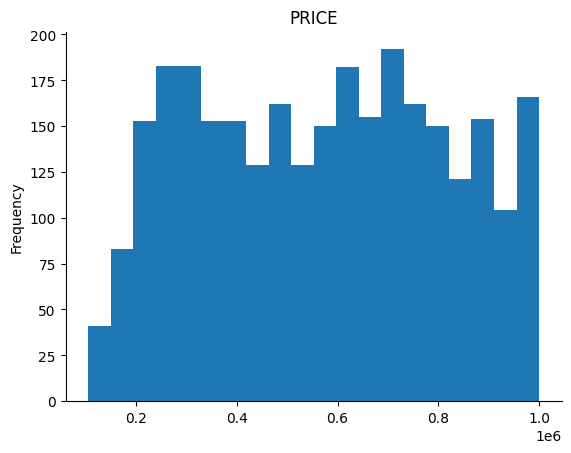

In [ ]:
# @title PRICE

from matplotlib import pyplot as plt
df_clip['PRICE'].plot(kind='hist', bins=20, title='PRICE')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
df_clip['PRICE'].plot(kind='hist', bins=20, title='PRICE')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
df_clip['BATH'].plot(kind='line', figsize=(8, 4), title='BATH')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
df_clip['BEDS'].plot(kind='line', figsize=(8, 4), title='BEDS')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Luke, Decision Tree Learning
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

data_table.disable_dataframe_formatter()


x = df_clip[['TYPE', 'BEDS', 'BATH', 'PROPERTYSQFT']]
y = df_clip['PRICE']

x_train, x_test, y_train, y_test = train_test_split(
          x, y, test_size = 0.3, random_state = 100)

def train_using_entropy(X_train, X_test, y_train):
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
        criterion="entropy", random_state=100,
        max_depth=None, min_samples_leaf=1)

    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy


# Function to make predictions
def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    #print("Predicted values:")
    #print(y_pred)
    return y_pred

# Placeholder function for cal_accuracy
def cal_accuracy(y_test, y_pred):
    print("Confusion Matrix: ",
          confusion_matrix(y_test, y_pred))
    print("Accuracy : ",
          r2_score(y_test, y_pred)*100)
    print("ABS Error : ",
          mean_absolute_error(y_test, y_pred))
    #print("Report : ",
          #classification_report(y_test, y_pred))

# Function to plot the decision tree
def plot_decision_tree(clf_object, feature_names, class_names):
    plt.figure(figsize=(15, 10))
    tree.plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
    plt.show()

clf_entropy = train_using_entropy(x_train, x_test, y_train)
text_representation = tree.export_text(clf_entropy)
print(len(text_representation))

In [ ]:
y_pred_entropy = prediction(x_test, clf_entropy)
cal_accuracy(y_test, y_pred_entropy)

In [ ]:
ell_0 = df_clip[['TYPE', 'BEDS', 'BATH', 'PROPERTYSQFT']]
ell_0 = ell_0[:4]
print(ell_0)
y_pred_entropy = prediction(ell_0, clf_entropy)
print("Predicted values:")
for i in range(len(y_pred_entropy)):
  print(f'{i} {y_pred_entropy[i]:9.0f}')
#predicted out = 315000
#print(df_clip[['BEDS', 'BATH', 'PROPERTYSQFT']])
act_val = df_clip['PRICE'][:4]
print(f'Actual values:\n{act_val}')

# Liam - K-Nearest Neighbors

In [ ]:
pip install python-geohash

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.metrics import mean_absolute_error
from scipy.spatial import distance
import numpy as np
import geohash

In [ ]:
df_dec

In [ ]:
df_clip = df_dec
df_clip = df_clip[(df['PRICE'] < 800000)& (df['PRICE'] > 100000)]
df_clip = df_clip[(df['BATH'] < 7) & (df['BATH'] > 0)]
df_clip = df_clip[(df['BEDS'] < 8) & (df['BEDS'] > 0)]
df_clip = df_clip.drop(['ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2', 'STREET_NAME', 'LONG_NAME', 'FORMATTED_ADDRESS'], axis=1)
def encode_geohash(row, precision=12):
    return geohash.encode(row['LATITUDE'], row['LONGITUDE'], precision=precision)
df_clip['GEOHASH'] = df_clip.apply(encode_geohash, axis=1, precision=6)
df_clip

BROKERTITLE            TYPE   PRICE  \
0     Brokered by Douglas Elliman  -111 Fifth Ave  Condo for sale  315000   
2                          Brokered by Sowae Corp  House for sale  260000   
5                          Brokered by Sowae Corp  House for sale  690000   
8                  Brokered by Pantiga Group Inc.  Co-op for sale  265000   
9                Brokered by CENTURY 21 MK Realty  Co-op for sale  440000   
...                                           ...             ...     ...   
4791               Brokered by Corcoran East Side  Co-op for sale  370000   
4796                          Brokered by COMPASS  Co-op for sale  599000   
4797              Brokered by Mjr Real Estate Llc  Co-op for sale  245000   
4799      Brokered by E Realty International Corp  Condo for sale  598125   
4800           Brokered by Nyc Realty Brokers Llc  Co-op for sale  349000   

      BEDS  BATH  ...         LOCALITY      SUBLOCALITY   LATITUDE  LONGITUDE  \
0        2   2.0  ...         New York        Manhattan  40.761255 -73.974483   
2        4   2.0  ...         New York  Richmond County  40.541805 -74.196109   
5        5   2.0  ...         New York     Kings County  40.674363 -73.958725   
8        1   1.0  ...        The Bronx       East Bronx  40.821586 -73.874089   
9        2   1.0  ...     Kings County         Brooklyn  40.615738 -73.969694   
...    ...   ...  ...              ...              ...        ...        ...   
4791     3   1.0  ...  New York County         New York  40.755822 -73.965514   
4796     1   1.0  ...  New York County         New York  40.774350 -73.955879   
4797     1   1.0  ...         New York    Queens County  40.732538 -73.860152   
4799     2   1.0  ...    Queens County           Queens  40.742770 -73.872752   
4800     1   1.0  ...     Kings County         Brooklyn  40.579147 -73.970949   

      GEOHASH  
0      dr5rus  
2      dr5nxs  
5      dr5rmh  
8      dr72nz  
9      dr5rhc  
...       ...  
4791   dr5rug  
4796   dr5rvn  
4797   dr5rxr  
4799   dr5ryb  
4800   dr5que  

[2331 rows x 11 columns]

In [ ]:
def kNearestNeighbors(k):
  ct = make_column_transformer(
      (StandardScaler(), ['PROPERTYSQFT']),
      (OneHotEncoder(handle_unknown="ignore"), ['TYPE', 'BEDS', 'BATH', 'LOCALITY', 'SUBLOCALITY', 'GEOHASH'])
  )
  pipeline = make_pipeline(
      ct,
      KNeighborsRegressor(k, weights='distance')
  )
  scores = cross_val_score(
      pipeline,
      X=df_clip[['TYPE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LOCALITY', 'SUBLOCALITY', 'GEOHASH']],
      y=df_clip['PRICE'],
      scoring="neg_mean_absolute_error",
      cv=10
  )
  return (-scores).mean()

In [ ]:
scores = []
for i in range(1, 30):
  score = kNearestNeighbors(i)
  scores.append(score)
print(min(scores))
print(scores.index(min(scores))+1)

95257.4986710403
11


In [ ]:
ct = make_column_transformer(
    (StandardScaler(), ['PROPERTYSQFT']),
    (OneHotEncoder(handle_unknown="ignore"), ['TYPE', 'BEDS', 'BATH', 'LOCALITY', 'SUBLOCALITY', 'GEOHASH'])
)
pipeline_11 = make_pipeline(
    ct,
    KNeighborsRegressor(11, weights='distance')
)
X_train, X_test, y_train, y_test =  train_test_split(
          df_clip[['TYPE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LOCALITY', 'SUBLOCALITY', 'GEOHASH']],
          df_clip['PRICE'], test_size = 0.2, random_state = 100
          )

pipeline_11.fit(
   X_train,
   y_train
)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['PROPERTYSQFT']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['TYPE', 'BEDS', 'BATH',
                                                   'LOCALITY', 'SUBLOCALITY',
                                                   'GEOHASH'])])),
                ('kneighborsregressor',
                 KNeighborsRegressor(n_neighbors=11, weights='distance'))])

In [ ]:
kneighbors_predictions = pipeline_11.predict(X_test)
X_test['PREDICTION'] = kneighbors_predictions

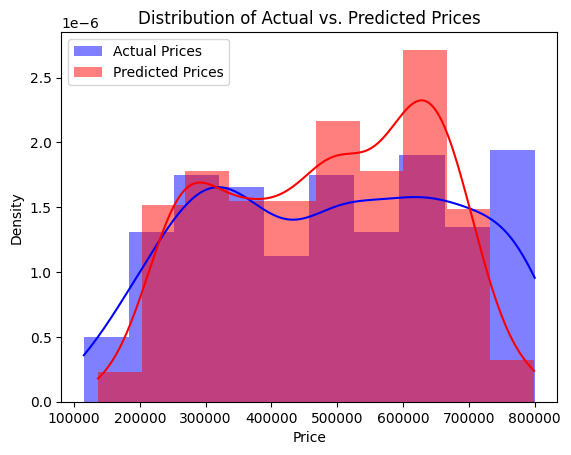

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(y_test, color="blue", label='Actual Prices', kde=True, stat="density", linewidth=0)
sns.histplot(X_test['PREDICTION'], color="red", label='Predicted Prices', kde=True, stat="density", linewidth=0)

plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Distribution of Actual vs. Predicted Prices')
plt.legend()
plt.show()

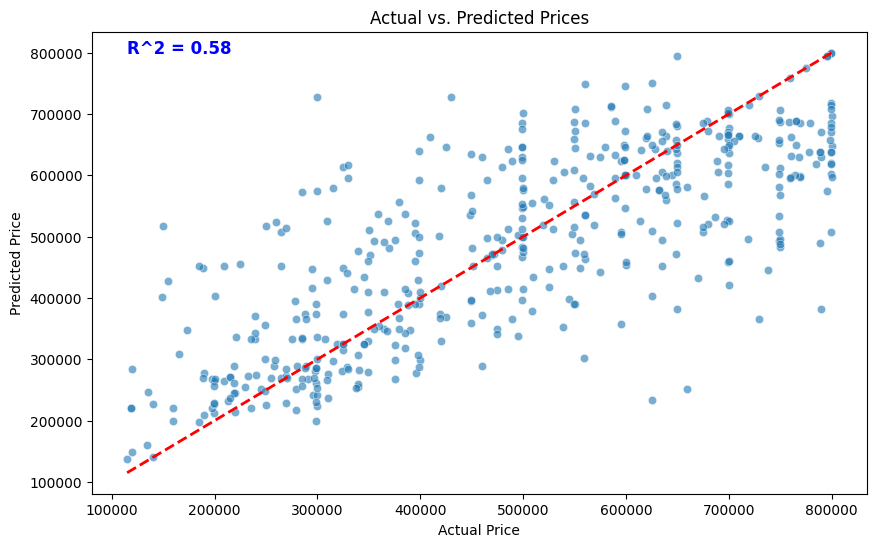

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.scatterplot(x=y_test, y=X_test['PREDICTION'], alpha=0.6)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
r_squared = r2_score(y_test, X_test['PREDICTION'])

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')

plt.text(x=min(y_test), y=max(X_test['PREDICTION']), s=f'R^2 = {r_squared:.2f}',
         fontweight='bold', fontsize=12, color='blue')

plt.title('Actual vs. Predicted Prices')
plt.show()

The distribution of predicted prices doesn't look too crazy, but the model rarely predicts prices above 850k compared to the actual prices.

In [ ]:
def mixed_distance_wrapper(cat_indices, num_indices):
    def mixed_distance(x, y):
        x, y = np.array(x), np.array(y)
        x_cat, x_num = x[cat_indices], x[num_indices]
        y_cat, y_num = y[cat_indices], y[num_indices]
        hamming_dist = np.sum(x_cat != y_cat) / len(cat_indices)
        euclidean_dist = np.sqrt(np.sum((x_num - y_num) ** 2))
        return hamming_dist + euclidean_dist
    return mixed_distance

In [ ]:
ct = ColumnTransformer([
    ('scale', StandardScaler(), ['PROPERTYSQFT']),
    ('encode', OneHotEncoder(handle_unknown='ignore'), ['TYPE', 'BEDS', 'BATH', 'LOCALITY', 'SUBLOCALITY'])
])

X = df_clip[['TYPE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LOCALITY', 'SUBLOCALITY']]
y = df_clip['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

X_train_transformed = ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)

X_train_transformed = X_train_transformed.toarray()
X_test_transformed = X_test_transformed.toarray()

transformed_feature_names = ct.get_feature_names_out()

cat_indices = []
num_indices = []

for i, feature_name in enumerate(transformed_feature_names):
    if 'scale' in feature_name:
        num_indices.append(i)
    else:
        cat_indices.append(i)
k = 11

knn = KNeighborsRegressor(n_neighbors=k, metric=mixed_distance_wrapper(cat_indices, num_indices), algorithm='brute')

knn.fit(X_train_transformed, y_train)

KNeighborsRegressor(algorithm='brute',
                    metric=<function mixed_distance_wrapper.<locals>.mixed_distance at 0x7b1fa0700040>,
                    n_neighbors=11)

In [ ]:
y_pred = knn.predict(X_test_transformed)
X_test['PREDICTION'] = y_pred

KeyboardInterrupt: 

KeyError: 'PREDICTION'

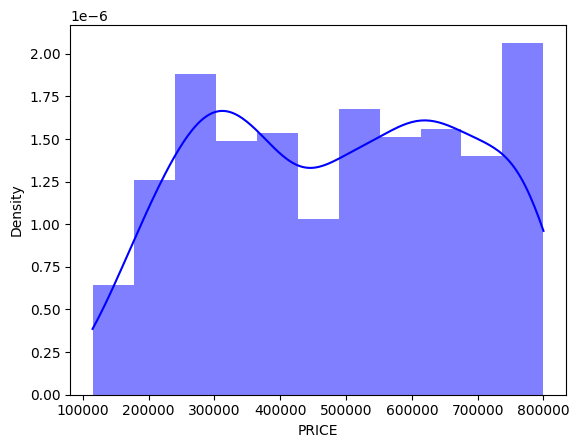

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(y_test, color="blue", label='Actual Prices', kde=True, stat="density", linewidth=0)
sns.histplot(X_test['PREDICTION'], color="red", label='Predicted Prices', kde=True, stat="density", linewidth=0)

plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Distribution of Actual vs. Predicted Prices')
plt.legend()
plt.show()

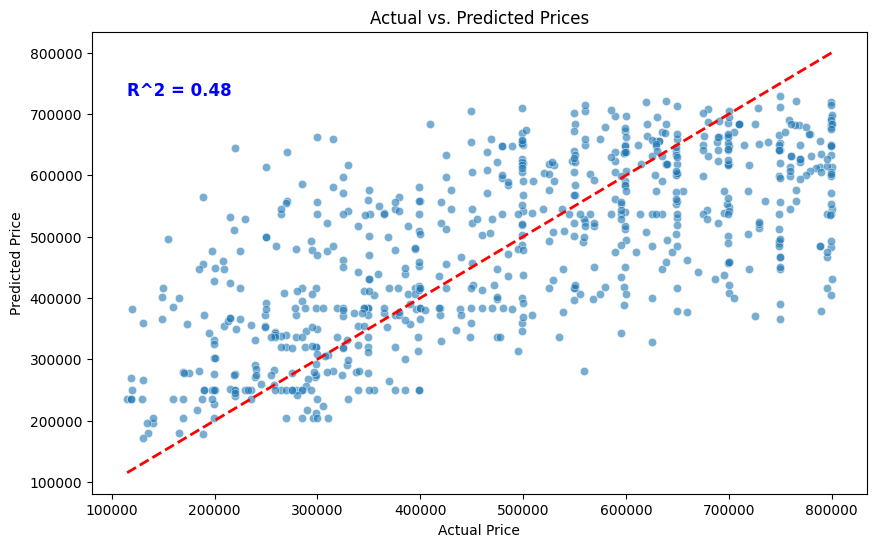

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.scatterplot(x=y_test, y=X_test['PREDICTION'], alpha=0.6)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')
r_squared = r2_score(y_test, X_test['PREDICTION'])

plt.text(x=min(y_test), y=max(X_test['PREDICTION']), s=f'R^2 = {r_squared:.2f}',
         fontweight='bold', fontsize=12, color='blue')

plt.title('Actual vs. Predicted Prices')
plt.show()

I tried a new approach with a different distance metric combining hamming distance and euclidean distance, but this actually made my predictions worse and made iterating much slower.